# Day 10 — Encode Categorical Features & Handle Outliers

---

## Encode Categorical Features:
Categorical encoding is converting categorical variables (textual or nominal data) into numerical format that machine learning algorithms can use. Common methods include:

- **Label Encoding**: Assigning each unique category an integer label. Suitable for ordinal categories or tree-based models.

- **One-Hot Encoding**: Creating binary columns for each category, indicating presence/absence. Good for nominal categorical variables with no intrinsic order.

- **Pandas Categorical dtype**: Efficient memory representation and can be used for encoding.


In [1]:
import pandas as pd
import numpy as np

# Synthetic dataset
data = {
    'City': ['New York', 'Los Angeles', 'New York', 'Chicago', 'Houston', 'Los Angeles', 'Boston', 'Boston', 'Chicago'],
    'Weather': ['Sunny', 'Rainy', 'Sunny', 'Cloudy', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Cloudy'],
    'Severity': [3, 2, 3, 1, 4, 2, 3, 3, 1],
    'Accidents': [100, 150, 100, 80, 90, 150, 60, 60, 80]
}

df = pd.DataFrame(data)
print("Original Dataset:")
print(df)


Original Dataset:
          City Weather  Severity  Accidents
0     New York   Sunny         3        100
1  Los Angeles   Rainy         2        150
2     New York   Sunny         3        100
3      Chicago  Cloudy         1         80
4      Houston   Sunny         4         90
5  Los Angeles   Rainy         2        150
6       Boston   Rainy         3         60
7       Boston   Sunny         3         60
8      Chicago  Cloudy         1         80


## Remove Duplicates:
Duplicates are repeated rows in the dataset that may bias analysis or models. Removing duplicates ensures data integrity and accuracy. Pandas `drop_duplicates()` method identifies and removes duplicate rows based on all or selected columns.


In [2]:
df_no_duplicates = df.drop_duplicates()
print("\nDataset after removing duplicates:")
print(df_no_duplicates)



Dataset after removing duplicates:
          City Weather  Severity  Accidents
0     New York   Sunny         3        100
1  Los Angeles   Rainy         2        150
3      Chicago  Cloudy         1         80
4      Houston   Sunny         4         90
6       Boston   Rainy         3         60
7       Boston   Sunny         3         60


## Label Encoding:
Convert `City` into numeric labels using pandas `category` dtype.

In [6]:
df_no_duplicates = df.drop_duplicates().copy()  # make a real copy
df_no_duplicates['City_Encoded'] = df_no_duplicates['City'].astype('category').cat.codes
print(df_no_duplicates[['City', 'City_Encoded']])


          City  City_Encoded
0     New York             4
1  Los Angeles             3
3      Chicago             1
4      Houston             2
6       Boston             0
7       Boston             0


## One-Hot Encoding:
Convert `Weather` into binary columns using `get_dummies`.


## Outliers Handling:
Outliers are data points that deviate significantly from the majority distribution. They may be errors or rare events.

Handling can be by:

- **Removal** if they are errors or noise.  
- **Capping** or transformation to reduce skew.  
- **Leaving as is** if meaningful for analysis.


In [4]:
# Detect and handle outliers in 'Accidents' using IQR
Q1 = df_no_duplicates['Accidents'].quantile(0.25)
Q3 = df_no_duplicates['Accidents'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_no_duplicates[(df_no_duplicates['Accidents'] < lower_bound) | 
                            (df_no_duplicates['Accidents'] > upper_bound)]
print("\nDetected outliers:")
print(outliers)

# Remove outliers
df_no_outliers = df_no_duplicates[(df_no_duplicates['Accidents'] >= lower_bound) &
                                  (df_no_duplicates['Accidents'] <= upper_bound)]
print("\nDataset after removing outliers:")
print(df_no_outliers)

# Cap outliers (winsorizing)
df_capped = df_no_duplicates.copy()
df_capped['Accidents'] = np.where(df_capped['Accidents'] > upper_bound, upper_bound,
                                  np.where(df_capped['Accidents'] < lower_bound, lower_bound, df_capped['Accidents']))
print("\nDataset after capping outliers:")
print(df_capped)



Detected outliers:
          City Weather  Severity  Accidents  City_Encoded
1  Los Angeles   Rainy         2        150             3

Dataset after removing outliers:
       City Weather  Severity  Accidents  City_Encoded
0  New York   Sunny         3        100             4
3   Chicago  Cloudy         1         80             1
4   Houston   Sunny         4         90             2
6    Boston   Rainy         3         60             0
7    Boston   Sunny         3         60             0

Dataset after capping outliers:
          City Weather  Severity  Accidents  City_Encoded
0     New York   Sunny         3     100.00             4
1  Los Angeles   Rainy         2     146.25             3
3      Chicago  Cloudy         1      80.00             1
4      Houston   Sunny         4      90.00             2
6       Boston   Rainy         3      60.00             0
7       Boston   Sunny         3      60.00             0


## Visualize Outliers:
Use a **boxplot** to see outliers in the `Accidents` column.


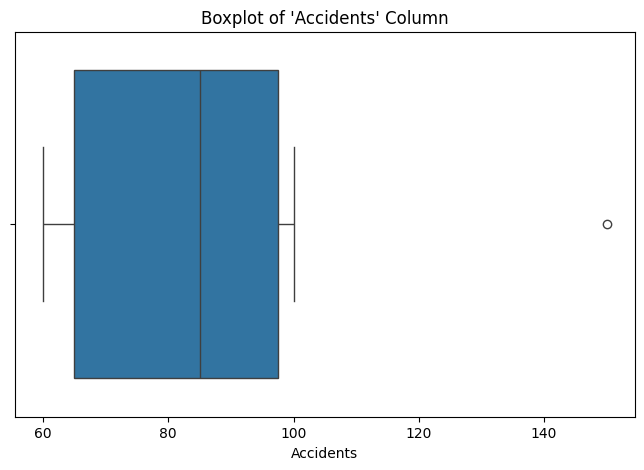

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x=df_no_duplicates['Accidents'])
plt.title("Boxplot of 'Accidents' Column")
plt.xlabel("Accidents")
plt.show()
